<a href="https://colab.research.google.com/github/angeloBuso/PLN_Processamento_Linguagem_Natural/blob/main/WordCloud_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Imagem" width="100%" src="https://raw.githubusercontent.com/angeloBuso/angeloBuso/main/image/Imagem2-notebook.png">

---

# Compreendendo como os computadores processam a *Linguagem Natural Humana*

## Usando especificamente a *Linguagem Escrita*

A **comunicação** está diretamente ligado ao desenvolvimento de nós, seres humanos. É uma atividade essencial para a sobrevivência, conviver em sociedade, além de auxiliar na busca das realizações pessoais e profissionais. O ato de comunicar tem a capacidade de integrar, instruir, desenvolver e relacionar-se mutuamente tanto nos contextos sociais e empresariais.

Neste sentido, a **linguagem** é a capacidade humana de comunicação, bem como suas manifestações, seja verbal ou não-verbal. Com tal capacidade conseguimos, transmitir de um indivíduo a outro, desde conhecimentos ciêntíficos ou não, situações vivenciadas, experiências vividas, fatos históricos, fatos fantasiosos,  coisas supérfluas, acontecimentos diários, infelizmente *fake-news*.... enfim!!! Trocar informações faz parte da vida de qualquer pessoa.

A **linguagem escrita** é uma destas capacidades que usamos para comunicar, interagir na sociedade. E na medida que a "*tecnologia*" cerca nossa sociedade, trazendo em seu bojo uma série de desafios e oportunidades, aumenta nossa necessidade de usar os computadores para ***aprenderem*** sobre essa capacidade humana de linguagem escrita. Assim como a *Visão Computacional* ensinam as máquinas como "enxergamos" o mundo com suas cores e formas, ***Processamento Linguagem Natural - PLN*** surge com suas técnicas e modelos para instruir as máquinas a lerem, escreverem e compreenderem a **língua humana**. Os usos de técnicas de PLN no nosso dia-a-dia vão desde os *apps* de tradução automáticas à *chatbot's*.

Processamento da Linguagem Natural - PLN em sua essência, é uma das sub-áreas da inteligência artificial que combina a Linguística (ciência das línguas) e a Ciência da Computação. (**ps.** a língua em que me refiro é o código de comunicação, exemplo português, libras, python, etc e não o músculo do rosto do corpo humano rsrsrsr)

Um ponto que merece destaque é que, nós humanos, lidamos com naturalidade com ambiguidades, irregularidades, vagueza e variedade quando usamos a linguagem escrita ou falada para nos comunicar. Entretanto, para as máquinas, a linguagem deve ser clara, coesa, simples e sem ambiguidade. Com isso em mente podemos concluir que, com as técnicas de **PLN** conseguimos automatizar [por enquanto] apenas **aspectos da língua** e não 100% dela, sendo uma ferramenta auxiliar as tarefas humanas e não de substituição! [por enquanto]


## 1. Compreensão Problema de Negócio
Neste projeto, iremos (i) extrair um texto no formato PDF, (ii) usar as técnicas de PLN para manipular o texto e (iii) visualizar quais palavras mais apresentam neste texto, no intuito de verificar se as palavras mais frequentes realmente são de domínio deste texto.

Para realizar a manipulação de arquivos em PDF e extrair o texto usaremos a bibiloteca `pdfplumber` que permite realizar tal tarefa. Como objetos do tipo texto são uma sequência de `strings`, para manipulação desses tipos de objetos o pyhton possui funções nativas que permite combinar a Linguística com computação e manipular esses objetos. No entanto, duas bibliotecas python possem em seu escopo o uso da Linguística com combinado com a iteração computacional a `Nltk` e a `SpaCy`. Usando os métodos e atributos destas bibliotecas de PLN, obtemos conciência situacional para trabalhar com textos. Por fim, a `wordcloud` permitirá de forma visual identificar as palavras que mais apareceram no texto.

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install -U spacy -q
!python -m spacy download pt_core_news_lg -q

     |████████████████████████████████| 45 kB 3.6 MB/s 
     |████████████████████████████████| 5.6 MB 40.8 MB/s 
     |████████████████████████████████| 139 kB 57.8 MB/s 
     |████████████████████████████████| 1.9 MB 44.1 MB/s 
     |████████████████████████████████| 5.9 MB 24.3 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 456 kB 42.6 MB/s 
     |████████████████████████████████| 10.1 MB 41.4 MB/s 
     |████████████████████████████████| 623 kB 52.3 MB/s 
     |████████████████████████████████| 576.7 MB 19 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [2]:
#pip install -U spacy-lookups-data

In [3]:
ls

sample_data/


In [4]:
# importar os pacotes necessarios para projeto
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pdfplumber
import spacy
import nltk
from wordcloud import WordCloud, ImageColorGenerator #, STOPWORDS
from PIL import Image

nltk.download(['stopwords', 'punkt'])




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 2. Obtenção dos Dados

É comum no dia-a-dia recebermos páginas no formato PDF contendo textos, informações, tabelas, gráficos, etc. Usando uma biblioteca python `pdfplumber` conseguirmos extrair esses objetos.

Neste projeto usaremos o Evangelho de São Lucas. Não é o intuito aqui fazer apologia religiosa. Apenas escolhi um texto bíblico dado a minha fé cristã e pela importância que os textos bíblicos possuem na minha história.

O script se adequa a qualquer texto de sua preferência.



### 2.1 Carga dos dados
Para fazer a leitura do arquivo em PDF, a forma mais simples que encontrei foi hospedando em meu Google Drive e realizando a leitura direto dele. 

Para este script utilizei o Colab, então a leitura do PDF em nuvem mostrou-se mais eficaz. Existem outras formas de realizar tal tarefa, hospedando no git, tranformando em um documento doc, enfim... Para esta tarefa, colocando no google drive mostrou-se mais perfomático!!!!

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Em PLN os nossos dataSet's são chamados de **Corpus**, que são uma coletânea de porções de linguagem em que iremos aplicar alguns critérios linguísticos.

In [7]:
# lendo o PDF
corpus = pdfplumber.open('salve o PDF no seu Drive, após montar o Drive coloque o Path aqui')

In [8]:
print('O Evangelho de São Lucas possui {} paginas que estão em uma {}'.format(len(corpus.pages), type(corpus.pages)))

O Evangelho de São Lucas possui 62 paginas que estão em uma <class 'list'>


Podemos acessar os metadados do PDF!

In [9]:
corpus.metadata

{'Author': 'USER',
 'Company': 'casa',
 'CreationDate': "D:20080926114925-03'00'",
 'Creator': 'Acrobat PDFMaker 8.1 for Word',
 'ModDate': "D:20080926114929-03'00'",
 'Producer': 'Acrobat Distiller 8.1.0 (Windows)',
 'Title': 'Evangelho segundo Lucas'}

## 3. Análise Exploratória dos Corpus

Visão geral dos dados que iremos analisar. É preciso compreender com o que estamos lidando.

Afim de passar por alguns conceitos de PLN iremos, inicialmente, explorar apena a página 1 do nosso objeto corpus!!! Lembrando que temos 62 páginas que faremos a extração e a construção da nuvem de palavras,

### 3.1 Extraindo texto


In [10]:
pag_1 = corpus.pages[0]
pag_1

<Page:1>

In [11]:
texto_pag_1 = pag_1.extract_text()
texto_pag_1
print(texto_pag_1)

Evangelho segundo Lucas 
 
 
Prólogo 
 
 
1 
 
1  Muitos  tentaram  escrever  a  história  dos  fatos  ocorridos  entre  nós,  2  assim  como  nos 
transmitiram aqueles que, desde o início, foram testemunhas oculares e, depois, se tornaram 
ministros da palavra. 3 Diante disso, decidi também eu, caríssimo Teófilo, redigir para ti um 
relato ordenado, depois de ter investigado tudo cuidadosamente desde as origens, 4 para que 
conheças a solidez dos ensinamentos que recebeste.  
 
PRIMÓRDIOS 
 
Anúncio do nascimento de João Batista 
 
5 No tempo de Herodes, rei da Judéia, havia um sacerdote, chamado Zacarias, da classe de Abias. 
Sua esposa era descendente de Aarão e chamava-se Isabel. 6 Ambos eram justos diante de Deus e 
cumpriam fielmente todos os mandamentos e preceitos do Senhor. 7 Não tinham filhos, pois 
Isabel era estéril, e os dois eram de idade avançada. 8 Ao exercer as funções sacerdotais diante de 
Deus, quando era a vez de sua classe, 9 conforme o costume dos sacerdotes, Zac

O tipo de objeto que estamos trabalhando é `string`, ou seja, o output do método `extract_text()` é a coleção de strigs capturadas no corpus.

In [12]:
texto_pag_1

'Evangelho segundo Lucas \n \n \nPrólogo \n \n \n1 \n \n1  Muitos  tentaram  escrever  a  história  dos  fatos  ocorridos  entre  nós,  2  assim  como  nos \ntransmitiram aqueles que, desde o início, foram testemunhas oculares e, depois, se tornaram \nministros da palavra. 3 Diante disso, decidi também eu, caríssimo Teófilo, redigir para ti um \nrelato ordenado, depois de ter investigado tudo cuidadosamente desde as origens, 4 para que \nconheças a solidez dos ensinamentos que recebeste.  \n \nPRIMÓRDIOS \n \nAnúncio do nascimento de João Batista \n \n5 No tempo de Herodes, rei da Judéia, havia um sacerdote, chamado Zacarias, da classe de Abias. \nSua esposa era descendente de Aarão e chamava-se Isabel. 6 Ambos eram justos diante de Deus e \ncumpriam fielmente todos os mandamentos e preceitos do Senhor. 7 Não tinham filhos, pois \nIsabel era estéril, e os dois eram de idade avançada. 8 Ao exercer as funções sacerdotais diante de \nDeus, quando era a vez de sua classe, 9 conforme o cost

In [13]:
type(texto_pag_1)

str

#### 3.1.1 Navegando pela página

Podemos navegar pelas quebras de linhas `\n`, com isso retornar uma substrings com método built-in `.split()`, ou ainda retornar um parágrafo específico. Podemos até retorna uma conjunto de palavras!!!

In [14]:
texto_pag_1.split('\n')[8][3:19]

'Muitos  tentaram'

### 3.2 Tokenizando o texto

O processo de tokenizar um texto é a redução ao menor grau, ou seja, como PNL queremos observar os aspectos linguísticos de um texto, reduzir o texto em parágrafos, estes últimos em sentenças e esses em palavras, nos permite ter flexibilidade para aplicar as técnicas necessárias. 

Se notarem, na célula acima, com o método `split()` podemos retonar o texto por palavras. Uma vez, tendo essas palavras separadas, identificaremos a quantidade de ocorrências no texto e de forma visual plotamos em uma nuvem de palavra, que por sinal, é o escopo desse projeto!!!

Para auxiliar nessa tarefa as bibliotecas `NLTK` e `SpaCy` possuem um conjunto de ferramentas que permite atingir ao nosso objetivo.

In [15]:
print(nltk.word_tokenize(texto_pag_1))

['Evangelho', 'segundo', 'Lucas', 'Prólogo', '1', '1', 'Muitos', 'tentaram', 'escrever', 'a', 'história', 'dos', 'fatos', 'ocorridos', 'entre', 'nós', ',', '2', 'assim', 'como', 'nos', 'transmitiram', 'aqueles', 'que', ',', 'desde', 'o', 'início', ',', 'foram', 'testemunhas', 'oculares', 'e', ',', 'depois', ',', 'se', 'tornaram', 'ministros', 'da', 'palavra', '.', '3', 'Diante', 'disso', ',', 'decidi', 'também', 'eu', ',', 'caríssimo', 'Teófilo', ',', 'redigir', 'para', 'ti', 'um', 'relato', 'ordenado', ',', 'depois', 'de', 'ter', 'investigado', 'tudo', 'cuidadosamente', 'desde', 'as', 'origens', ',', '4', 'para', 'que', 'conheças', 'a', 'solidez', 'dos', 'ensinamentos', 'que', 'recebeste', '.', 'PRIMÓRDIOS', 'Anúncio', 'do', 'nascimento', 'de', 'João', 'Batista', '5', 'No', 'tempo', 'de', 'Herodes', ',', 'rei', 'da', 'Judéia', ',', 'havia', 'um', 'sacerdote', ',', 'chamado', 'Zacarias', ',', 'da', 'classe', 'de', 'Abias', '.', 'Sua', 'esposa', 'era', 'descendente', 'de', 'Aarão', 'e',

### 3.3 Nuvem palavra

In [16]:
def nuvem_palavra(stop, texto):
  wordcloud = WordCloud(stopwords=stop,
                        background_color="black").generate(texto)
  fig, ax = plt.subplots(figsize=(10,10))
  ax.imshow(wordcloud, interpolation='bilinear')
  plt.tight_layout()


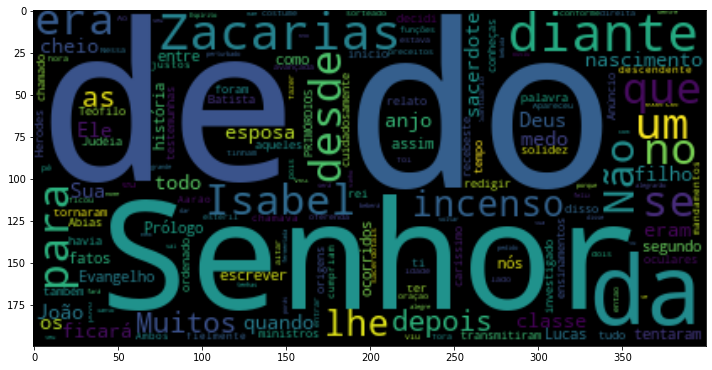

In [17]:
nuvem_palavra(['a'],texto_pag_1)

### 3.4 Pré Processando os texto
Gerando a nuvem de palavras, no texto sem alguns passos prévios podemos identificar dois possíveis problemas:
* Problema 1: no texto exitem a mesma palavra escrita com *caixa* diferente, ou seja, a mesma palavra escrita de forma maíscula e minúscula. Como python é *case sensitive* a contagem podem ser difentes.
* Problema 2: existem palavras no texto que não agregam informações em nossas análises, não diz nada para o escopo do projeto. Essas palavras são usadas para conectarem verbos com substantivos e são conhecidas como ***stopwords***.

Solução:

Para o problema 1 podemos usar os métodos pyhton `.lower()` ou `.upper()` que colocarão todos os tokens em um único padrão. Já para o segundo problema temos que retirar as *stopswords* das nossas análises.

#### 3.4.1 Stopwords
Como vimos as *stopwords* são esses tokens que possuem uma frequência alta no texto mais não contribuem para as análises desejadas

A biblioteca `wordcloud` que estamos usando para gerar a nuvem de palavras, possui (i) um parâmetro que podemos indicar uma lista destas *stopwords* e (ii) um objeto STOPWORD que define um conjunto de palavras que enquadra no conceito de *stopword*, no entato, em inglês. Se teu texto estiver em inglês será de grande valia.

Mas..... aprofundando na biblioteca `NLTK` notamos que ela possui uma lista de palavras que se enquadram nas *stopwords* e ainda em português!!! 

In [18]:
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

### 3.5 Nuvem palavra após pré-processamento

Agora podemos notar as palavras de domínio nesta primeira página do Evangelho de São Lucas.

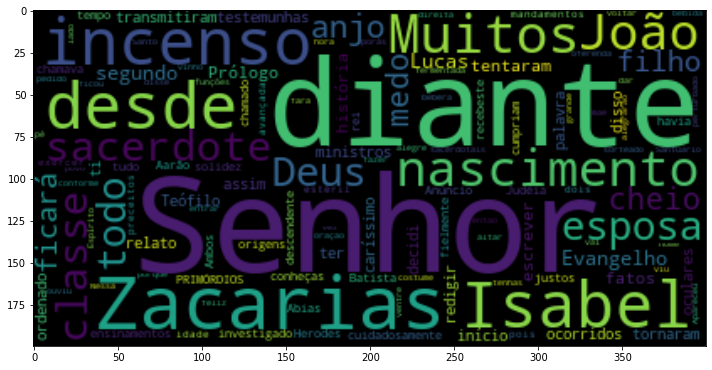

In [19]:
nuvem_palavra(stopwords, texto_pag_1)



---



## 4. Explorando Corpus

Após passar por alguns conceitos chaves e usar técnicas de PLN para tratar tais pontos, agora iremos (i) ler todas a páginas em PDF, (ii) extrair o texto, (iii) aplicar tokenização, para (iv) verificar as palavras de domínio mais frequentes no Evangelho de São Lucas e (v) montar uma nuvem de palavras!! 

Esse seria nosso pipeline.

### 4.1 Lendo e extraindo PDF's

Das 62 páginas em PDF, iremos ler, extrair e colocar em uma lista os objetos desta extração.

In [20]:
len(corpus.pages)

62

In [21]:
texto = [corpus.pages[page].extract_text() for page in range(len(corpus.pages))]
type(texto)

list

Notamos que o objeto `texto` é uma lista contendo cada página do Evangelho extraído.

Pelo fato de ser uma lista, podemos acessar cada página, usando um `slice`. Iremos acessar a página 7.

In [22]:
texto[6]

'1 No décimo quinto ano do império de Tibério César, quando Pôncio Pilatos era governador da \nJudéia; Herodes, tetrarca da Galiléia; seu irmão Filipe, tetrarca da Ituréia e da Traconítide, e \nLisânias, tetrarca de Abilene; 2 enquanto Anás e Caifás eram sumos sacerdotes, a palavra de \nDeus veio a João, o filho de Zacarias, no deserto. 3 Ele percorreu toda a região do Jordão, \npregando um batismo de conversão para o perdão dos pecados, 4 como está escrito no livro dos \noráculos do profeta Isaías: \n “Voz de quem clama no deserto: Preparai o caminho do Senhor, endireitai as veredas para ele. \n 5 Todo vale será aterrado; toda montanha e colina serão rebaixadas; as passagens tortuosas \nserão endireitadas, e os caminhos esburacados, aplanados. \n6 E todos verão a salvação que vem de Deus”. \n7 João dizia às multidões que iam a ele para serem batizadas: “Víboras que sois, quem vos \nensinou  a  querer  fugir  da  ira  que  está  para  chegar?  8  Produzi  frutos  que  mostrem  vossa \n

### 4.2 Obtendo strings

Para usar a geradora de nuvem de palavra, há necessidade de passar como parâmetro o texto no formato de `string`. 

Dentre várias forma de atingir o objetivo, iremos usar esta:

In [23]:
texto_completo = ' '.join(palavra for palavra in texto)
texto_completo

'Evangelho segundo Lucas \n \n \nPrólogo \n \n \n1 \n \n1  Muitos  tentaram  escrever  a  história  dos  fatos  ocorridos  entre  nós,  2  assim  como  nos \ntransmitiram aqueles que, desde o início, foram testemunhas oculares e, depois, se tornaram \nministros da palavra. 3 Diante disso, decidi também eu, caríssimo Teófilo, redigir para ti um \nrelato ordenado, depois de ter investigado tudo cuidadosamente desde as origens, 4 para que \nconheças a solidez dos ensinamentos que recebeste.  \n \nPRIMÓRDIOS \n \nAnúncio do nascimento de João Batista \n \n5 No tempo de Herodes, rei da Judéia, havia um sacerdote, chamado Zacarias, da classe de Abias. \nSua esposa era descendente de Aarão e chamava-se Isabel. 6 Ambos eram justos diante de Deus e \ncumpriam fielmente todos os mandamentos e preceitos do Senhor. 7 Não tinham filhos, pois \nIsabel era estéril, e os dois eram de idade avançada. 8 Ao exercer as funções sacerdotais diante de \nDeus, quando era a vez de sua classe, 9 conforme o cost

In [24]:
print(texto_completo)

Evangelho segundo Lucas 
 
 
Prólogo 
 
 
1 
 
1  Muitos  tentaram  escrever  a  história  dos  fatos  ocorridos  entre  nós,  2  assim  como  nos 
transmitiram aqueles que, desde o início, foram testemunhas oculares e, depois, se tornaram 
ministros da palavra. 3 Diante disso, decidi também eu, caríssimo Teófilo, redigir para ti um 
relato ordenado, depois de ter investigado tudo cuidadosamente desde as origens, 4 para que 
conheças a solidez dos ensinamentos que recebeste.  
 
PRIMÓRDIOS 
 
Anúncio do nascimento de João Batista 
 
5 No tempo de Herodes, rei da Judéia, havia um sacerdote, chamado Zacarias, da classe de Abias. 
Sua esposa era descendente de Aarão e chamava-se Isabel. 6 Ambos eram justos diante de Deus e 
cumpriam fielmente todos os mandamentos e preceitos do Senhor. 7 Não tinham filhos, pois 
Isabel era estéril, e os dois eram de idade avançada. 8 Ao exercer as funções sacerdotais diante de 
Deus, quando era a vez de sua classe, 9 conforme o costume dos sacerdotes, Zac

In [25]:
type(texto_completo)

str

#### 4.2.1 Nuvem Palavras com texto completo

Com o texto devidamente extraído e colocado no formato de `string` podemos gerar uma nuvem de palavra e visualizar as palavras mais frequentes.

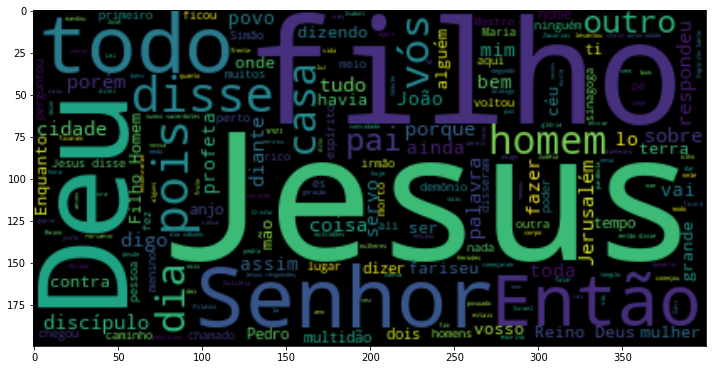

In [26]:
nuvem_palavra(stopwords, texto_completo)

In [27]:
len(texto_completo)
texto_completo[:9]

'Evangelho'

Entretanto, a medida em que aumentamos o corpus, objeto textual em que estamos analisando, temos necessidades de usar técnicas e ferramentas mais robustas. Pois da forma que fizemos até agora para realmente verificar que as palavras que possuem realmente destaca na nuvem de palavras são as mais frequentes.

Sendo assim, usando o pacote `SpaCy` iremos tokenizar nosso Evangelho de São Lucas completo e refinar nossas análises.

### 4.3 Tokenizando Texto
Antes de iniciar o uso da biblioteca `SpaCy` que tem um dos principais objetivos que é otimizar as principais tarefas de processamento de texto com base em PLN, a biblioteca utiliza dois tipos de objetos (i)`doc` e (ii) `token`.

Fazendo um paralelo, um objeto do tipo `doc` possui a mesma idéia dos corpus, ou seja, é uma coleção de objetos do tipo `token`, esse último continua sendo a menor fração de sentença. O que temos de novo nessa biblioteca é os **modelos de linguagem** é o que permite a biblioteca a robustez, sendo que um objeto do tipo `doc` é o texto após ser processado por esses modelos de linguagem.

In [28]:
# instanciamos um Modelo de linguagem
nlp = spacy.load('pt_core_news_lg')

# passamos o texto ao objeto instanciado pelo Modelo de linguagem
doc = nlp(texto_completo)

Para extrairmos os `tokens` basta apenas iterarmos sobre o objeto do tipo `doc` e ainda combinar com métodos da biblioteca que permite extrair (a) tokens apenas compostos por letras, (b) tokens apenas de números, (c) tokens constituídos apenas por pontuações, entre outros.

Com isso já percebemos como a biblioteca é poderosa!

In [29]:
tokens_letras = [token.orth_ for token in doc if token.is_alpha]
print("Tokens compostos apenas por: \n")
print("-> letras %s" % tokens_letras)

tokens_number = [token.orth_ for token in doc if token.is_digit]
print("-> n° %s" % tokens_number)

tokens_punct = [token.orth_ for token in doc if token.is_punct]
print("-> pontuações %s" % tokens_punct)

Tokens compostos apenas por: 

-> letras ['Evangelho', 'segundo', 'Lucas', 'Prólogo', 'Muitos', 'tentaram', 'escrever', 'a', 'história', 'dos', 'fatos', 'ocorridos', 'entre', 'nós', 'assim', 'como', 'nos', 'transmitiram', 'aqueles', 'que', 'desde', 'o', 'início', 'foram', 'testemunhas', 'oculares', 'e', 'depois', 'se', 'tornaram', 'ministros', 'da', 'palavra', 'Diante', 'disso', 'decidi', 'também', 'eu', 'caríssimo', 'Teófilo', 'redigir', 'para', 'ti', 'um', 'relato', 'ordenado', 'depois', 'de', 'ter', 'investigado', 'tudo', 'cuidadosamente', 'desde', 'as', 'origens', 'para', 'que', 'conheças', 'a', 'solidez', 'dos', 'ensinamentos', 'que', 'recebeste', 'PRIMÓRDIOS', 'Anúncio', 'do', 'nascimento', 'de', 'João', 'Batista', 'No', 'tempo', 'de', 'Herodes', 'rei', 'da', 'Judéia', 'havia', 'um', 'sacerdote', 'chamado', 'Zacarias', 'da', 'classe', 'de', 'Abias', 'Sua', 'esposa', 'era', 'descendente', 'de', 'Aarão', 'e', 'Isabel', 'Ambos', 'eram', 'justos', 'diante', 'de', 'Deus', 'e', 'cumpri

Podemos afirmar que no texto em que estamos analisando, Evangelho de São Lucas, possuem 21.616 palavras!!!!

In [30]:
len(tokens_letras)

21616

### 4.4 Frequência de palavras no Evangelho
Após iterar sobre os objetos do tipo `token` observamos que temos uma lista deles. Com isso conseguimos agora calcular uma **frequência de palavras**.

In [31]:
type(tokens_letras)

list

Notamos que as palavras com mais frequências no nosso texto, são palavras que possuem o conceito de *stopwords*, ou seja, para o nosso propósito não agrega informação.

In [32]:
frequencia = nltk.FreqDist(tokens_letras)
frequencia.most_common(30)

[('e', 847),
 ('de', 703),
 ('que', 659),
 ('a', 641),
 ('o', 630),
 ('os', 306),
 ('Jesus', 286),
 ('para', 259),
 ('do', 257),
 ('não', 238),
 ('se', 195),
 ('com', 192),
 ('um', 163),
 ('da', 147),
 ('em', 139),
 ('ele', 136),
 ('Deus', 128),
 ('no', 128),
 ('disse', 118),
 ('O', 117),
 ('é', 117),
 ('filho', 112),
 ('E', 111),
 ('uma', 109),
 ('dos', 101),
 ('por', 92),
 ('Ele', 91),
 ('ao', 90),
 ('as', 89),
 ('Senhor', 89)]

In [33]:
top_10 = pd.DataFrame(frequencia.most_common(10), columns=['Palavras', 'Quantidade'])
top_10

,Palavras,Quantidade
0,e,847
1,de,703
2,que,659
3,a,641
4,o,630
5,os,306
6,Jesus,286
7,para,259
8,do,257
9,não,238


### 4.5 Frequência sem as stopwords
Aqui atuamos naqueles dois problemas que apontamos lá no item 3.4 (Problema 1 mesma palavra escrita com maíscula e minúscula. Problema 2 retiramos as *stopwords*.)

Podemos ter uma nítida compreensão das palavras que mais apareceram no texto e confirmar que tais palavras fazem parte do domínio do texto, Evangelho de São Lucas!!

In [34]:
frequencia = nltk.FreqDist([token for token in tokens_letras if token.lower() not in stopwords])
frequencia.most_common(30)

[('Jesus', 286),
 ('Deus', 128),
 ('disse', 118),
 ('filho', 112),
 ('Senhor', 89),
 ('vós', 72),
 ('casa', 67),
 ('Então', 63),
 ('todos', 62),
 ('pois', 60),
 ('respondeu', 60),
 ('homem', 58),
 ('sobre', 57),
 ('porém', 55),
 ('porque', 52),
 ('dia', 52),
 ('então', 50),
 ('discípulos', 49),
 ('digo', 46),
 ('Filho', 42),
 ('João', 40),
 ('ser', 40),
 ('Reino', 40),
 ('povo', 39),
 ('tudo', 38),
 ('Jerusalém', 37),
 ('mim', 36),
 ('cidade', 36),
 ('diante', 34),
 ('dias', 34)]

Em um formato tabular podemos identificar as 10 palavras com mais frequência no texto.

In [35]:
top_10 = pd.DataFrame(frequencia.most_common(10), columns=['Palavras', 'Quantidade'])
top_10

,Palavras,Quantidade
0,Jesus,286
1,Deus,128
2,disse,118
3,filho,112
4,Senhor,89
5,vós,72
6,casa,67
7,Então,63
8,todos,62
9,pois,60


### 4.6 Nuvem de palavras

Agora iremos construir a nuvem de palavras usando apenas os tokens que possuem apenas palavas, excluindo os palavras que são *stopwords*, fazendo o tratamento para observar a questão da mesma palavra estar na sua forma maíscula e minúscula no texto.

In [36]:
only_texto = " ".join(token for token in tokens_letras if token.lower() not in stopwords)
type(only_texto)

str

In [37]:
len([token for token in tokens_letras if token.lower() not in stopwords])

11466

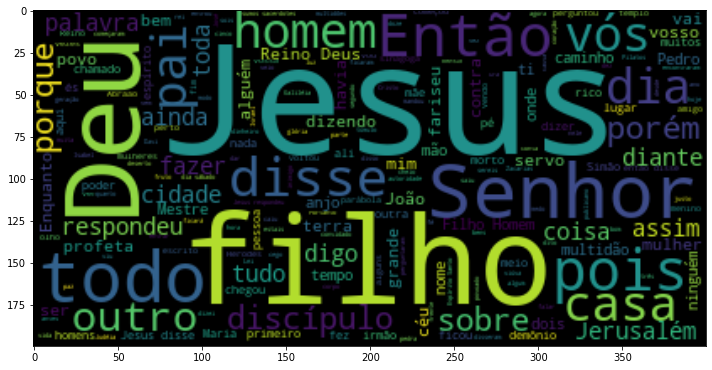

In [38]:
nuvem_palavra(stopwords, only_texto)

Não existe ferramenta 100%...... ou seja, não há perfeição nas soluções feitas pelos homens!!!

Podemos notar que algumas palavras ainda aparecem no texto e **conhecendo** o texto que esta analisando podemos atualizar a lista de stopwords.

In [39]:
print('A lista contendo as stopwords possuem {} palavras!!'.format(len(stopwords)))

A lista contendo as stopwords possuem 204 palavras!!


In [40]:
# atualizando as stopword
new_stopword = ['Então', 'disse', 'pois', 'deu']
for i in new_stopword:
  stopwords.append(i)
print('Agora a lista contendo as stopwords possuem {} palavras!!'.format(len(stopwords)))

Agora a lista contendo as stopwords possuem 208 palavras!!


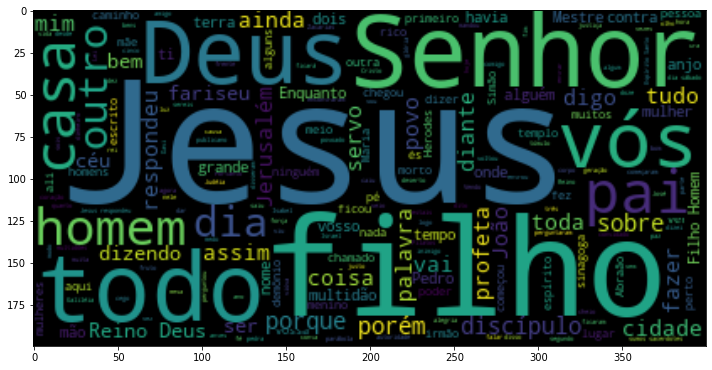

In [41]:
 nuvem_palavra(stopwords, only_texto)

Agora observamos as principais palavras do texto em que analisamo!

Mas... podemos melhorar esse visual!!!!!

## 5. Customizando a Nuvem de Palavras

Conhecer as ferramentas com que trabalhamos, permite realizar customizações. Podemos inserir um fundo com uma imagem que condiz com o texto analisado.

Usando um parâmetro da biblioteca `wordcloud`, podemos inserir uma imagem em que as intensidades dos *pixels* são considerados e o que está em preto é a área para desenhar as palavras.

In [42]:
# endereço da sua imagem
cruz_mask = np.array(Image.open("coloque aqui path da sua imagem"))

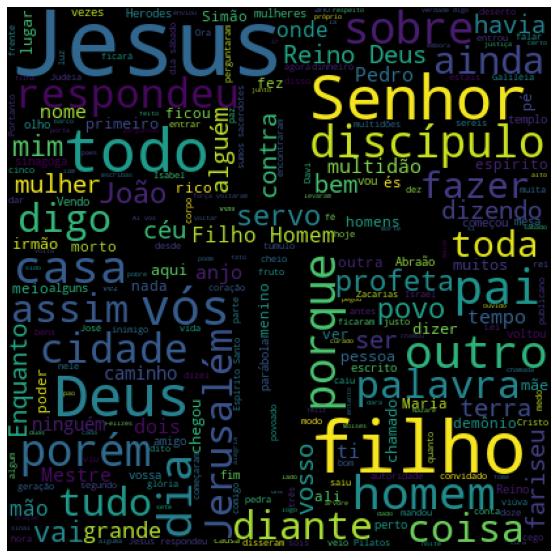

In [44]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=255,
                      mask=cruz_mask, max_font_size=500,
                      min_font_size=3).generate(only_texto)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("nome.png")

Agora sim!!! usando algumas técnicas de PLN podemos obter esse visual... e as técnicas de PLN não param por ai... podemos fazer análise de sentimentos com base nas palavras indicadas no texto.... análise morfológicas/sintáticas das palavras.. similaridades entre palavras....enfim... tem muito campo para fazer com PLN !!!



---

